In [21]:
import pandas as pd

train = pd.read_csv('20_train_final.csv', index_col='date')
train.drop('Unnamed: 0', axis=1, inplace=True)
test = pd.read_csv('20_test_final.csv')

In [22]:
train

,rain_sum (mm),cloudcover (%),relativehumidity_2m (%),elevation,surface_pressure (hPa),cloudcover_mid (%),cloudcover_high (%),direct_normal_irradiance (W/m²),cloudcover_low (%),direct_radiation (W/m²),...,windspeed_100m (km/h),soil_moisture_0_to_7cm (m³/m³),shortwave_radiation (W/m²),shortwave_radiation_sum (MJ/m²),diffuse_radiation (W/m²),soil_moisture_7_to_28cm (m³/m³),sunrise_to_sunset,et0_fao_evapotranspiration (mm)_y,is_snowing,is_snowing.1
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,7.7,0.730417,0.798571,0.0,0.925065,0.290417,0.907917,0.197808,0.319631,0.339211,...,0.038542,0.644171,0.542527,0.542566,0.519873,0.632397,0.925573,0.473753,0,0
2018-01-02,9.4,0.628333,0.781027,0.0,0.926811,0.176250,0.925000,0.233465,0.304950,0.414316,...,0.064021,0.684645,0.612814,0.612893,0.533046,0.660796,0.926006,0.539370,0,0
2018-01-03,7.8,0.640417,0.751787,0.0,0.927590,0.203750,0.969583,0.267005,0.257970,0.488767,...,0.077514,0.646445,0.630580,0.630475,0.439927,0.642984,0.925573,0.555118,0,0
2018-01-04,29.7,0.589167,0.797271,0.0,0.930143,0.237917,0.807500,0.275523,0.237836,0.506400,...,0.063662,0.698768,0.630469,0.630475,0.409039,0.673560,0.925573,0.553806,0,0
2018-01-05,22.5,0.522083,0.774529,0.0,0.930575,0.131667,0.943750,0.243911,0.178691,0.457941,...,0.075432,0.706825,0.619809,0.619988,0.471497,0.719573,0.925573,0.545932,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-29,0.4,0.817500,0.454191,0.0,0.822248,0.829583,0.624583,0.107636,0.195889,0.062304,...,0.384339,0.323412,0.246724,0.246761,0.396321,0.401346,0.599308,0.217848,0,0
2021-07-30,2.8,0.902917,0.566602,0.0,0.836312,0.662500,0.375833,0.089744,0.518456,0.050940,...,0.243953,0.319147,0.251055,0.251080,0.424938,0.401346,0.599308,0.165354,0,0
2021-07-31,2.1,0.934167,0.653021,0.0,0.816882,0.720417,0.382500,0.063435,0.669883,0.071186,...,0.123161,0.354597,0.286920,0.286860,0.463093,0.401346,0.599308,0.157480,0,0


In [23]:
X = train.drop('rain_sum (mm)', axis=1)
y = train['rain_sum (mm)']

In [24]:
from sklearn.model_selection import train_test_split

# assume X and y are your data and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [17]:
import numpy as np

In [25]:
X_train = X_train.to_numpy().reshape((X_train.shape[0],  X_train.shape[1], 1))
X_test = X_test.to_numpy().reshape((X_test.shape[0],  X_test.shape[1], 1))

In [26]:
X_train.shape

(10494, 22, 1)

In [27]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2] )))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train,epochs=10, verbose=1, callbacks = [early_stop], validation_data=(X_test, y_test))

Epoch 1/10
 15/328 [>.............................] - ETA: 18:53 - loss: 117.3285

KeyboardInterrupt: 

In [37]:
predict = model.predict(X_test)

82/82 [==============================] - 12s 114ms/step


In [39]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))

In [40]:
predict = scalar.inverse_transform(predict)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [42]:
Ytesting = scalar.inverse_transform(y_test)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

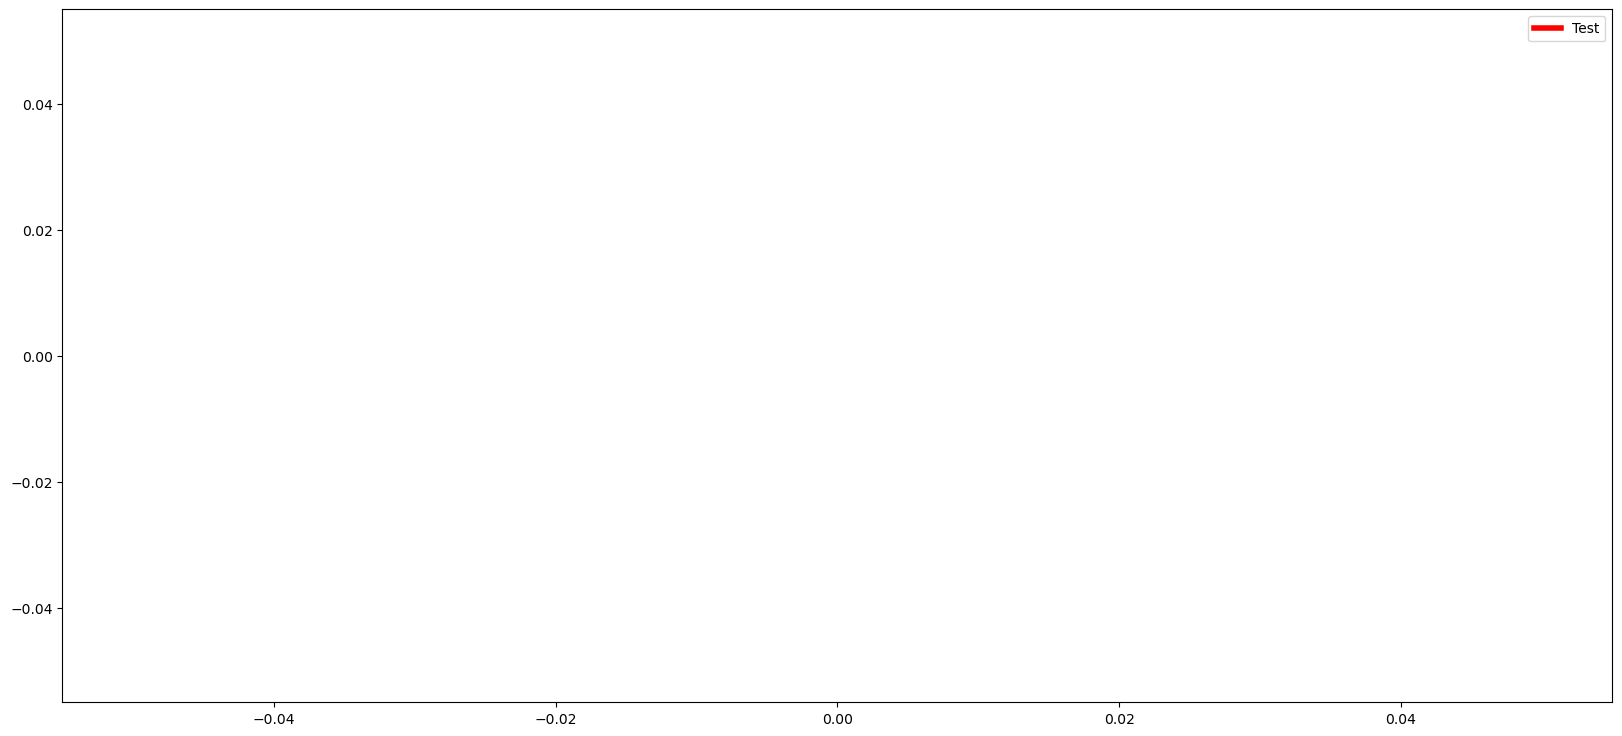

In [45]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,9))
# plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

NameError: name 'Ytesting' is not defined